In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import gmaps
import statsmodels.api as sm

In [2]:
post_secondary_csv = pd.read_csv("post_sec_data_clean.csv")
post_secondary_df = pd.DataFrame(post_secondary_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
post_secondary_df = post_secondary_df[["county","counts"]]
post_secondary_df  = post_secondary_df.rename(columns={"counts": "school_counts"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [4]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [5]:
post_secondary_df.head()

,county,school_counts
0,"Los Angeles, CA",228
1,"Cook, IL",125
2,"Maricopa, AZ",92
3,"New York, NY",91
4,"Miami-Dade, FL",88


In [6]:
sample_home_ownership = home_ownership_df.sample(n=1400)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Martin, MN",74.6
1,"Kiowa, OK",69.2
2,"Daviess, MO",78.7
3,"Rock, WI",68.7
4,"Morris, KS",77.8


In [7]:
post_sec_analysis = sample_home_ownership.merge(post_secondary_df, on="county")
post_sec_analysis.head()

,county,HOR,school_counts
0,"Rock, WI",68.7,5
1,"Mendocino, CA",59.2,2
2,"Essex, MA",63.8,12
3,"Valencia, NM",80.5,1
4,"Mahoning, OH",68.7,7


In [8]:
len(post_sec_analysis)

641

## Analysis

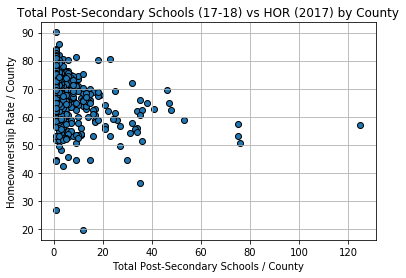

In [9]:
plt.scatter(post_sec_analysis["school_counts"], post_sec_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Total Post-Secondary Schools (17-18) vs HOR (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.savefig('Pictures/Post_sec_scatter.png')

In [10]:
y = post_sec_analysis["HOR"]
x = post_sec_analysis["school_counts"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.184
Model:                            OLS   Adj. R-squared (uncentered):              0.182
Method:                 Least Squares   F-statistic:                              144.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):                    4.63e-30
Time:                        19:25:37   Log-Likelihood:                         -3557.3
No. Observations:                 641   AIC:                                      7117.
Df Residuals:                     640   BIC:                                      7121.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
school_counts     2.6125      0.218     11.999      0.000       2.185       3.040
==============================================================================
Omnibus:                      639.892   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29246.591
Skew:                          -4.526   Prob(JB):                         0.00
Kurtosis:                      34.829   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Set line
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

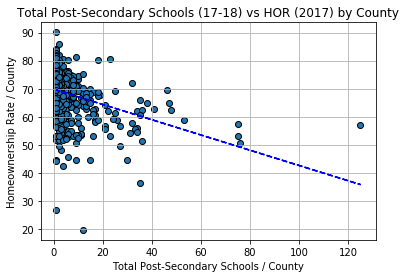

In [12]:
plt.scatter(post_sec_analysis["school_counts"], post_sec_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Total Post-Secondary Schools (17-18) vs HOR (2017) by County")
plt.ylabel("Homeownership Rate / County")
plt.xlabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Post_sec_regression.png')